# Machine Learning II Project

Group Members:
- Daniel Kruk 20211687
- Marcelo Junior 20211677<br>

# Customer Segmentation <br>
The main goal of this notebook is to identify relevant customer segments using statistical and machine learning techniques. In Notebook 1, we explored the customer_info and customer_basket datasets and performed some data cleaning and preprocessing. In this notebook, we will use these datasets to cluster customers based on their shared characteristics and develop targeted marketing strategies.

## Libraries
Firstly, we will import the needed libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Optional Intel Acceleration
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Preparing the data
In this step, we will prepare the data for clustering.<br>
The importation of the data will be followed by the removal of unecessary columns for this part.

In [2]:
# Dataset Importation
path = '/Users/marcelojunior/Documents/Nova IMS - Lisboa (2021 - 2024)/4º Semestre/Machine Learning II.nosync/KeizerKrukis/Project Data/'

# Customer Info Preprocessed
customer_info_ppc = pd.read_csv(path + "Customer Info PPC.csv")

# Customer Basket Preprocessed
customer_basket_ppc = pd.read_csv(path + "Customer Basket PPC.csv")

In [3]:
customer_info_ppc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29774 entries, 0 to 29773
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              29774 non-null  int64  
 1   customer_name                            29774 non-null  object 
 2   highest_education                        29774 non-null  int64  
 3   customer_gender                          29774 non-null  int64  
 4   Age                                      29774 non-null  int64  
 5   kids_home                                29774 non-null  float64
 6   teens_home                               29774 non-null  float64
 7   number_complaints                        29774 non-null  float64
 8   distinct_stores_visited                  29774 non-null  float64
 9   lifetime_spend_groceries                 29774 non-null  float64
 10  lifetime_spend_electronics               29774

The `Custoemr Info PPC` dataset will be treated first.

In [4]:
customer_info_ppc.columns
# Loyalty_card_number is useless for this part.
# As per advice, binary variables will be dropped for the segmentation, but will be analysed a posteriori
# strings, such as customer_name should always be dropped and customer_id, as its values do not represent anything

customer_info_seg = customer_info_ppc.drop(['loyalty_card_number', 'has_loyalty_card', 'customer_name', 'customer_id'], axis = 1)

In [5]:
test = customer_info_seg.iloc[:1000,:10]

In [6]:
model = KMeans(n_clusters=4, random_state=0)
fit_model = model.fit(test)

: 

: 

In [ ]:
customer_info_seg

,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,latitude,longitude,family_size,total_spending
0,0,0,23,0.0,0.0,0.0,2.0,91.0,20.0,22.0,...,48.0,47.0,105.0,85.0,0.192154,2017.0,38.754263,-9.163397,0.0,1545.0
1,0,1,41,1.0,0.0,0.0,2.0,197.0,5958.0,21.0,...,80.0,45.0,1964.0,85.0,0.098647,2015.0,38.777761,-9.156197,1.0,10219.0
2,3,0,36,1.0,1.0,0.0,20.0,397.0,20.0,9.0,...,170.0,46.0,5.0,408.0,0.497251,2008.0,38.785329,-9.127113,2.0,1753.0
3,0,0,80,3.0,4.0,1.0,2.0,5282.0,237.0,12.0,...,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,38.744086,-9.156589,7.0,11195.0
4,0,0,23,0.0,0.0,0.0,2.0,82.0,22.0,21.0,...,39.0,48.0,103.0,83.0,0.200625,2015.0,38.756024,-9.162970,0.0,1370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,3,0,48,0.0,0.0,1.0,2.0,209.0,5474.0,20.0,...,11.0,57.0,1984.0,112.0,0.096366,2008.0,38.734446,-9.171911,0.0,9730.0
29770,0,1,37,0.0,0.0,0.0,3.0,185.0,1066.0,15.0,...,41.0,50.0,197.0,22.0,0.118998,2014.0,38.767070,-9.144301,0.0,2416.0
29771,0,1,22,0.0,0.0,0.0,2.0,83.0,23.0,23.0,...,52.0,51.0,94.0,77.0,0.199432,2016.0,38.728487,-9.164140,0.0,1491.0
29772,0,1,64,1.0,0.0,1.0,20.0,391.0,20.0,10.0,...,132.0,54.0,5.0,398.0,0.494527,2006.0,38.751123,-9.182512,1.0,1608.0


## Scaling

In [ ]:
# Scale the data with Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_info_seg)

## PCA

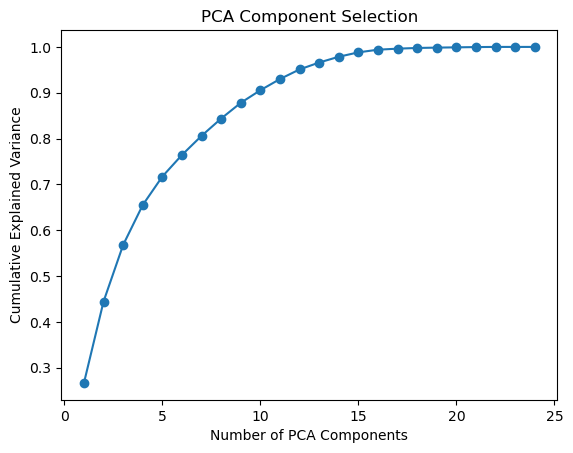

In [ ]:
# Find the optimal number of components for PCA
pca_range = range(1, len(X_scaled[0]) + 1)
pca_scores = []

for n_components in pca_range:
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)
    pca_scores.append(sum(pca.explained_variance_ratio_))

plt.plot(pca_range, pca_scores, 'o-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Component Selection')
plt.show()

In [ ]:
# Choose the number of components based on the elbow point in the plot )4 or 5)
n_components = 5

# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
customer_info_pca = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = customer_info_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])


In [ ]:
# Fitting a KMeans algorithm with 2 centroids and random state=0
kmeans = KMeans(n_clusters=2, random_state=0)

# Fitting the kmeans object to our data
kmeans.fit(X_scaled)


KMeans(n_clusters=2, random_state=0)

In [ ]:
#from sklearn.manifold import TSNE
# Reduce the dimensionality with t-SNE
#tsne = TSNE(n_components=2, random_state=0)
#tsne_result = tsne.fit_transform(X_scaled)


# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/marcelojunior/opt/anaconda3/envs/MachineLearning1/lib/python3.9/site-packages/daal4py/sklearn/manifold/_t_sne.py:137: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn("The default initialization in TSNE will change "
/Users/marcelojunior/opt/anaconda3/envs/MachineLearning1/lib/python3.9/site-packages/daal4py/sklearn/manifold/_t_sne.py:153: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn("The default learning rate in TSNE will change "


: 

: 

# Determine optimal number of clusters

In [ ]:
# Find the optimal number of clusters using silhouette score
cluster_range = range(2, 11)
silhouette_scores = []

#for n_clusters in cluster_range:
#    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#    cluster_labels = kmeans.fit_predict(customer_info_pca)
    #silhouette_scores.append(silhouette_score(customer_info_pca, cluster_labels))

#plt.plot(cluster_range, silhouette_scores, 'o-')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Silhouette Score')
#plt.title('Cluster Selection')
#plt.show()


In [ ]:

# Choose the number of clusters based on the highest silhouette score
n_clusters = 4

# Perform KMeans clustering with the selected number of clusters
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#cluster_labels = kmeans.fit_predict(customer_info_pca)

# Add the cluster labels to the customer_info dataset
#customer_info['cluster'] = cluster_labels

: 

: 

# K-Means Clustering

In [ ]:
# Apply k-means clustering with the optimal number of clusters
#kmeans = KMeans(n_clusters=4)
#kmeans.fit(X_pca)

: 

: 

# Visualise the Clusters

In [ ]:
# Plot the clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_)
plt.title('Customer Segmentation')
plt.show()